# Introduction
**In this notebook you will find EDA and Multiple LInear Regression Analysis of House Prices for beginners in a very simple and clear manner**

# Overview

**This is an exploratory data analysis on the House Prices Kaggle Competition found at**

**https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

** Feel free to provide suggestion and comment on the script. Your valuable suggestion are always welcome **

# A very simple tutorial for beginners to start data exploration and data modelling
- Explore the data
- EDA
- Data Modeling
- Data Validation

# Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error


# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Head train data
train.shape

(1460, 81)

In [ ]:
# Head train data
test.shape

(1459, 80)

In [ ]:
# Get all the numeric variables
numeric_features= train.select_dtypes(include= [np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# Get all categorical variables
categorical_features= train.select_dtypes(include= [np.object])
categorical_features.head()

<ipython-input-7-2a7d9f0f0937>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features= train.select_dtypes(include= [np.object])


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<ipython-input-8-330a42dbf2bf>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train.skew(), color="blue", axlabel= "Skewness")
<ipython-input-8-330a42dbf2bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.skew(), color="blue", axlabel= "Skewness")


<Axes: xlabel='Skewness', ylabel='Density'>

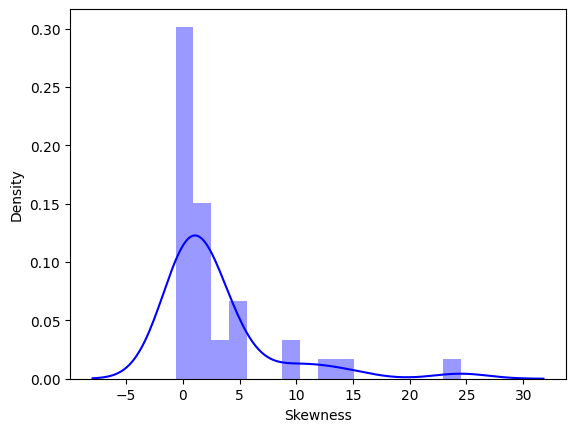

In [ ]:
# Skewness plot
sns.distplot(train.skew(), color="blue", axlabel= "Skewness")

<ipython-input-9-29e5cf08c670>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",
<ipython-input-9-29e5cf08c670>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",


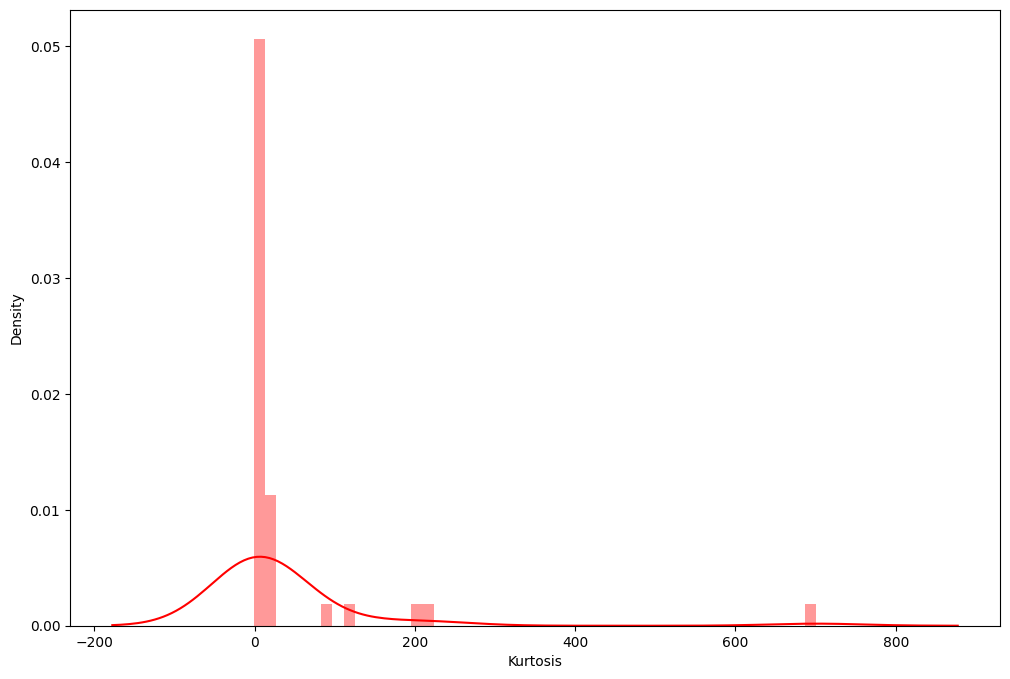

In [ ]:
# Kurtosis plot
plt.figure(figsize=(12,8))
sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",
            norm_hist= False, kde=True, rug= False)

plt.show()

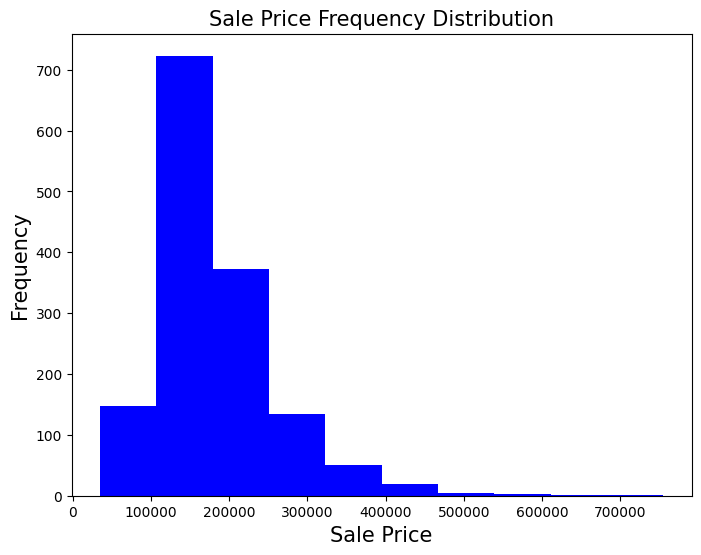

In [ ]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution", fontsize=15)
plt.hist(train["SalePrice"], color= "blue")
plt.show()

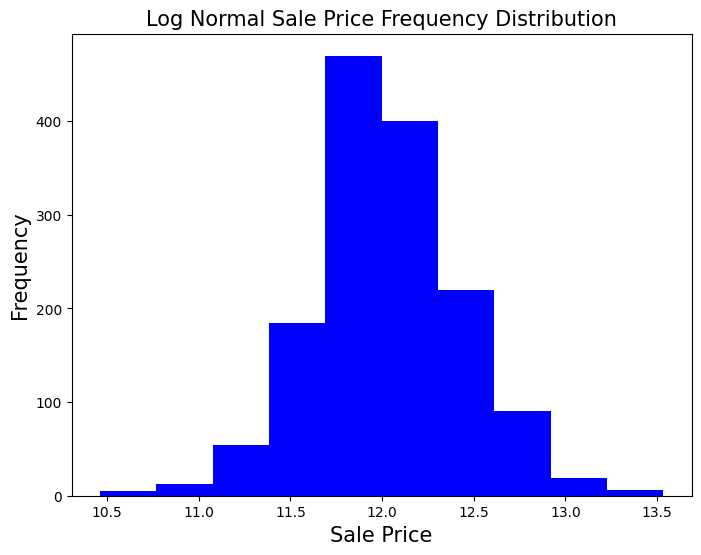

In [ ]:
# Log normal histogram of target variable
target= np.log(train["SalePrice"])
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Log Normal Sale Price Frequency Distribution", fontsize=15)
plt.hist(target, color= "blue")
plt.show()

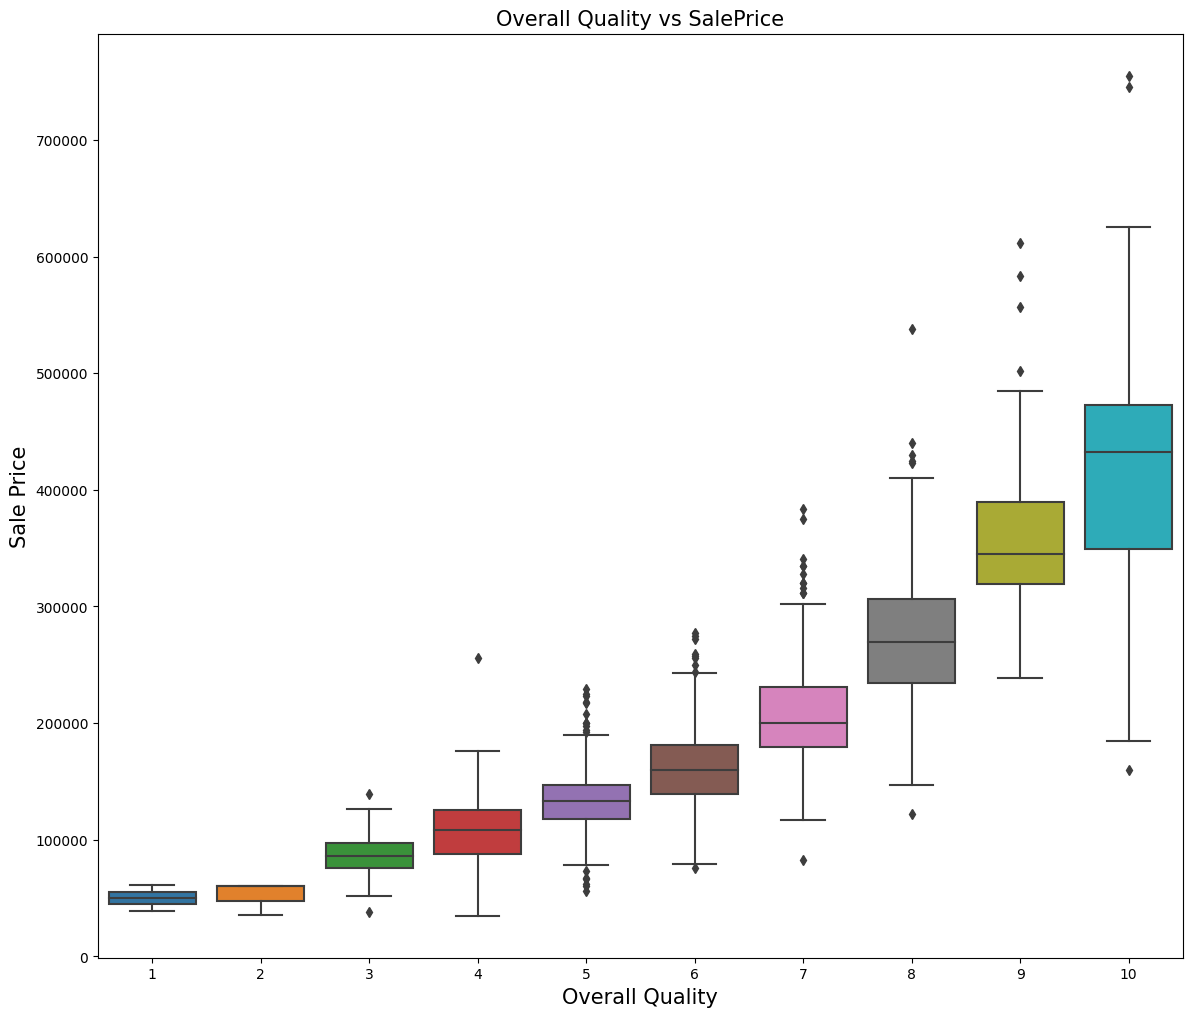

In [ ]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallQual", data= train)
plt.title("Overall Quality vs SalePrice", fontsize=15)
plt.xlabel("Overall Quality", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

In [ ]:
# Get correlation of numeric variables
correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
GarageArea        62.343144
TotalBsmtSF       61.358055
1stFlrSF          60.585218
FullBath          56.066376
TotRmsAbvGrd      53.372316
YearBuilt         52.289733
YearRemodAdd      50.710097
GarageYrBlt       48.636168
MasVnrArea        47.749305
Fireplaces        46.692884
BsmtFinSF1        38.641981
LotFrontage       35.179910
WoodDeckSF        32.441344
2ndFlrSF          31.933380
OpenPorchSF       31.585623
HalfBath          28.410768
LotArea           26.384335
BsmtFullBath      22.712223
BsmtUnfSF         21.447911
BedroomAbvGr      16.821315
ScreenPorch       11.144657
PoolArea           9.240355
MoSold             4.643225
3SsnPorch          4.458367
BsmtFinSF2        -1.137812
BsmtHalfBath      -1.684415
MiscVal           -2.118958
Id                -2.191672
LowQualFinSF      -2.560613
YrSold            -2.892259
OverallCond       -7.785589
MSSubClass        -8

<Axes: title={'center': 'Correlation of Numeric Featuer with Sale Price'}>

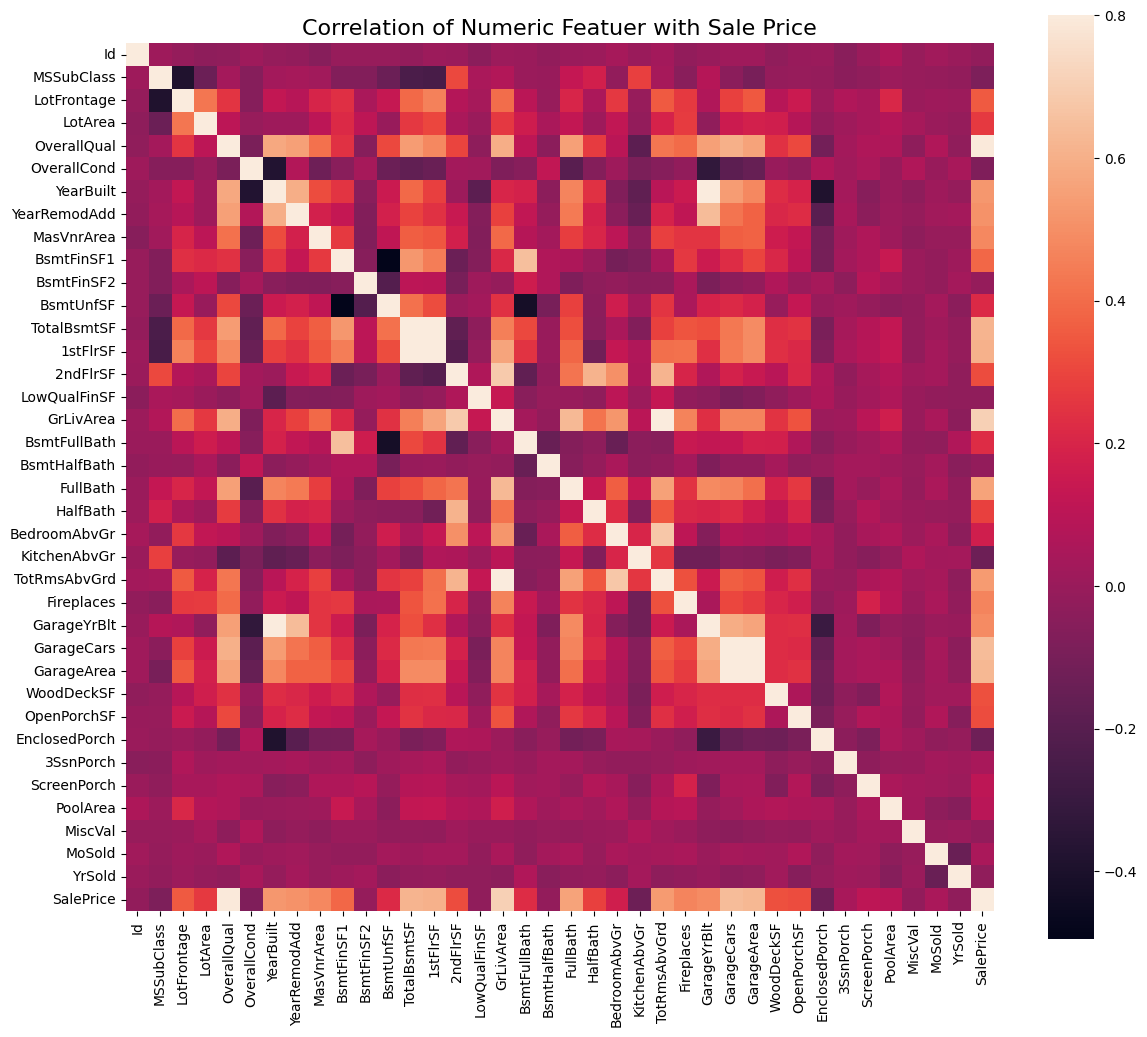

In [ ]:
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Featuer with Sale Price", y=1, size=16)
sns.heatmap(correlation, square= True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

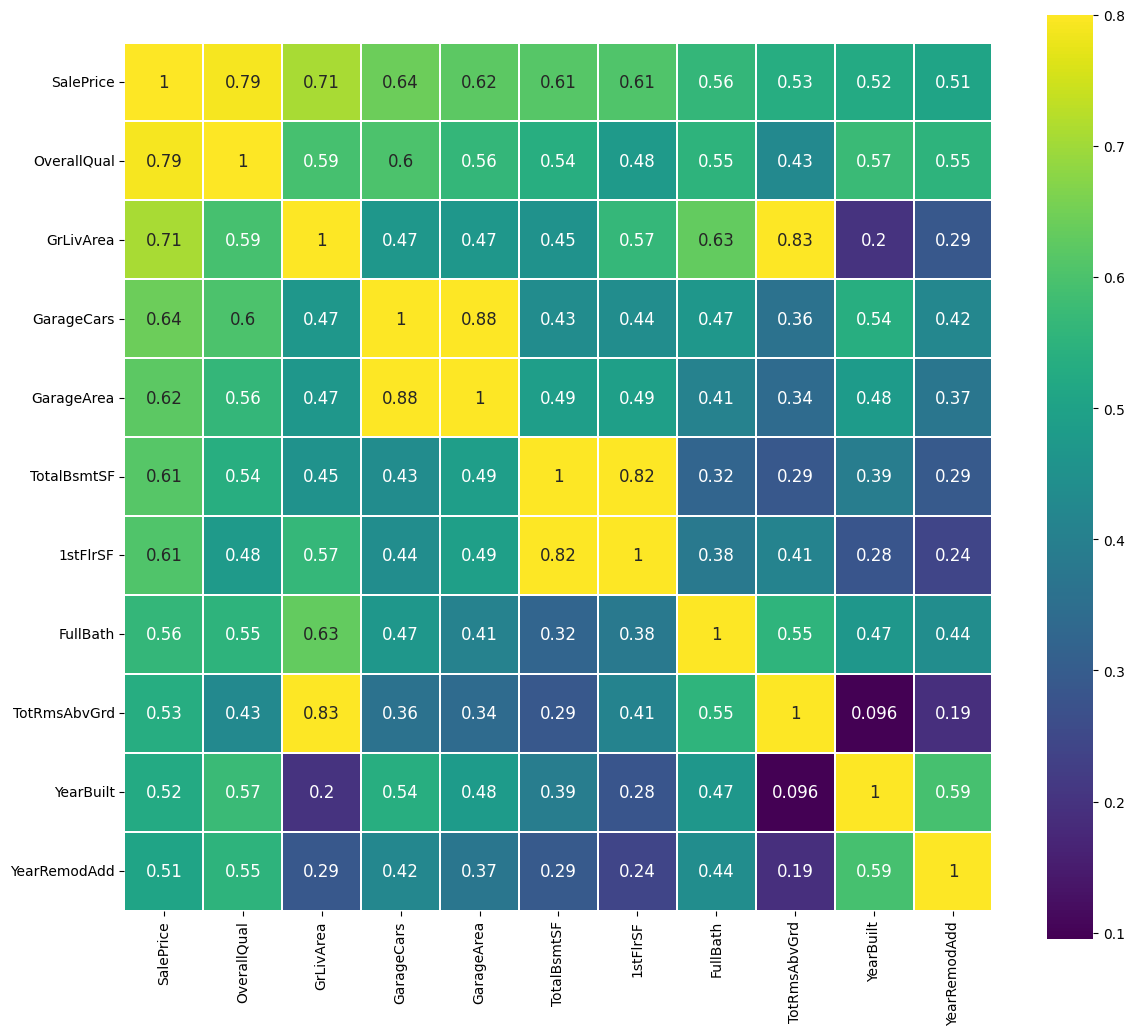

In [ ]:
# Zoomed Heat Map
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)



In [ ]:
# We can see the multicollinearity between GarageCars and GarageArea, TotalBsmtSF and 1stflrSF, TotRmsAbvGrd and GrLivArea

# train["GarageCars"].corr(train["SalePrice"]), train["GarageArea"].corr(train["SalePrice"]),
# train["TotalBsmtSF"].corr(train["SalePrice"]), train["1stFlrSF"].corr(train["SalePrice"])
# train["TotRmsAbvGrd"].corr(train["SalePrice"]), train["GrLivArea"].corr(train["SalePrice"])

In [ ]:
# Drop correlated variables
train.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)
test.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)

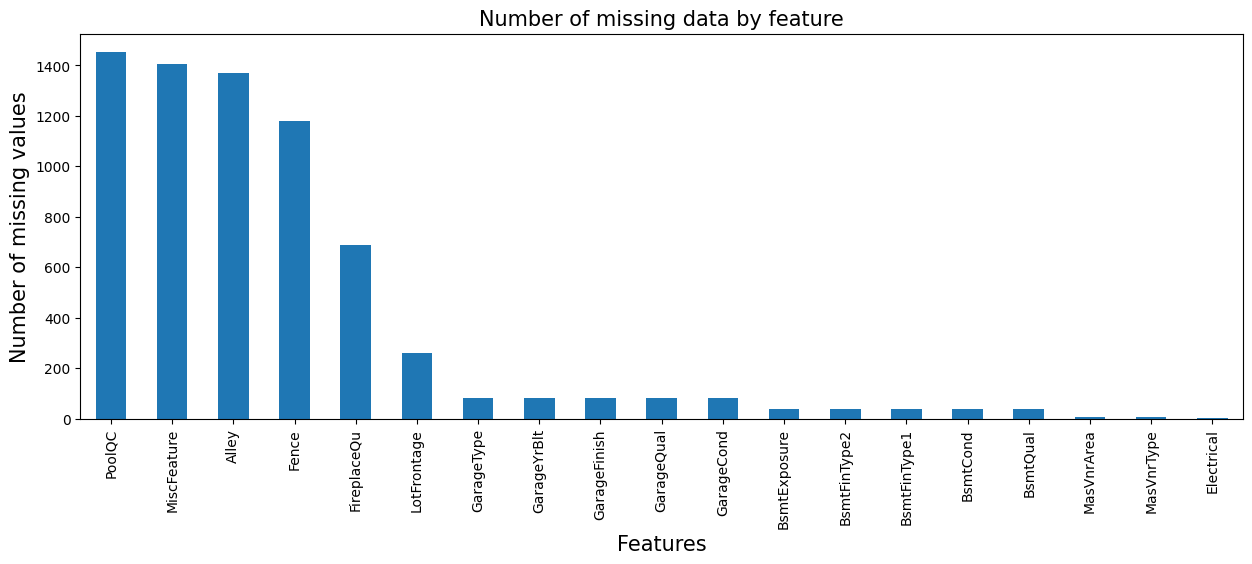

In [ ]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= train.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [ ]:
# Get total and percent missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945


In [ ]:
# Delete missing values variables from the dataset

train.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)
test.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)

# correlation= numeric_features.corr()
# correlation["SalePrice"].sort_values(ascending=False)*100

In [ ]:
# Check the shape of train and test data
train.shape, test.shape

((1460, 73), (1459, 72))

In [ ]:
# Delet numeric features which are not correlated from the train data
train.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [ ]:
# Delet numeric features which are not correlated from the test data
test.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [ ]:
# Check shape of train and test
train.shape, test.shape

((1460, 46), (1459, 45))

In [ ]:
# Head of categorical features
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# Get the remaining numeric variables
numeric_features= train.select_dtypes(include= [np.number])
numeric_features.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,2003,856,1710,2,2,208500
1,6,1976,1976,1262,1262,2,2,181500
2,7,2001,2002,920,1786,2,2,223500
3,7,1915,1970,756,1717,1,3,140000
4,8,2000,2000,1145,2198,2,3,250000


In [ ]:
# Get the correlation
correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

SalePrice       100.000000
OverallQual      79.098160
GrLivArea        70.862448
GarageCars       64.040920
TotalBsmtSF      61.358055
FullBath         56.066376
YearBuilt        52.289733
YearRemodAdd     50.710097
Name: SalePrice, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


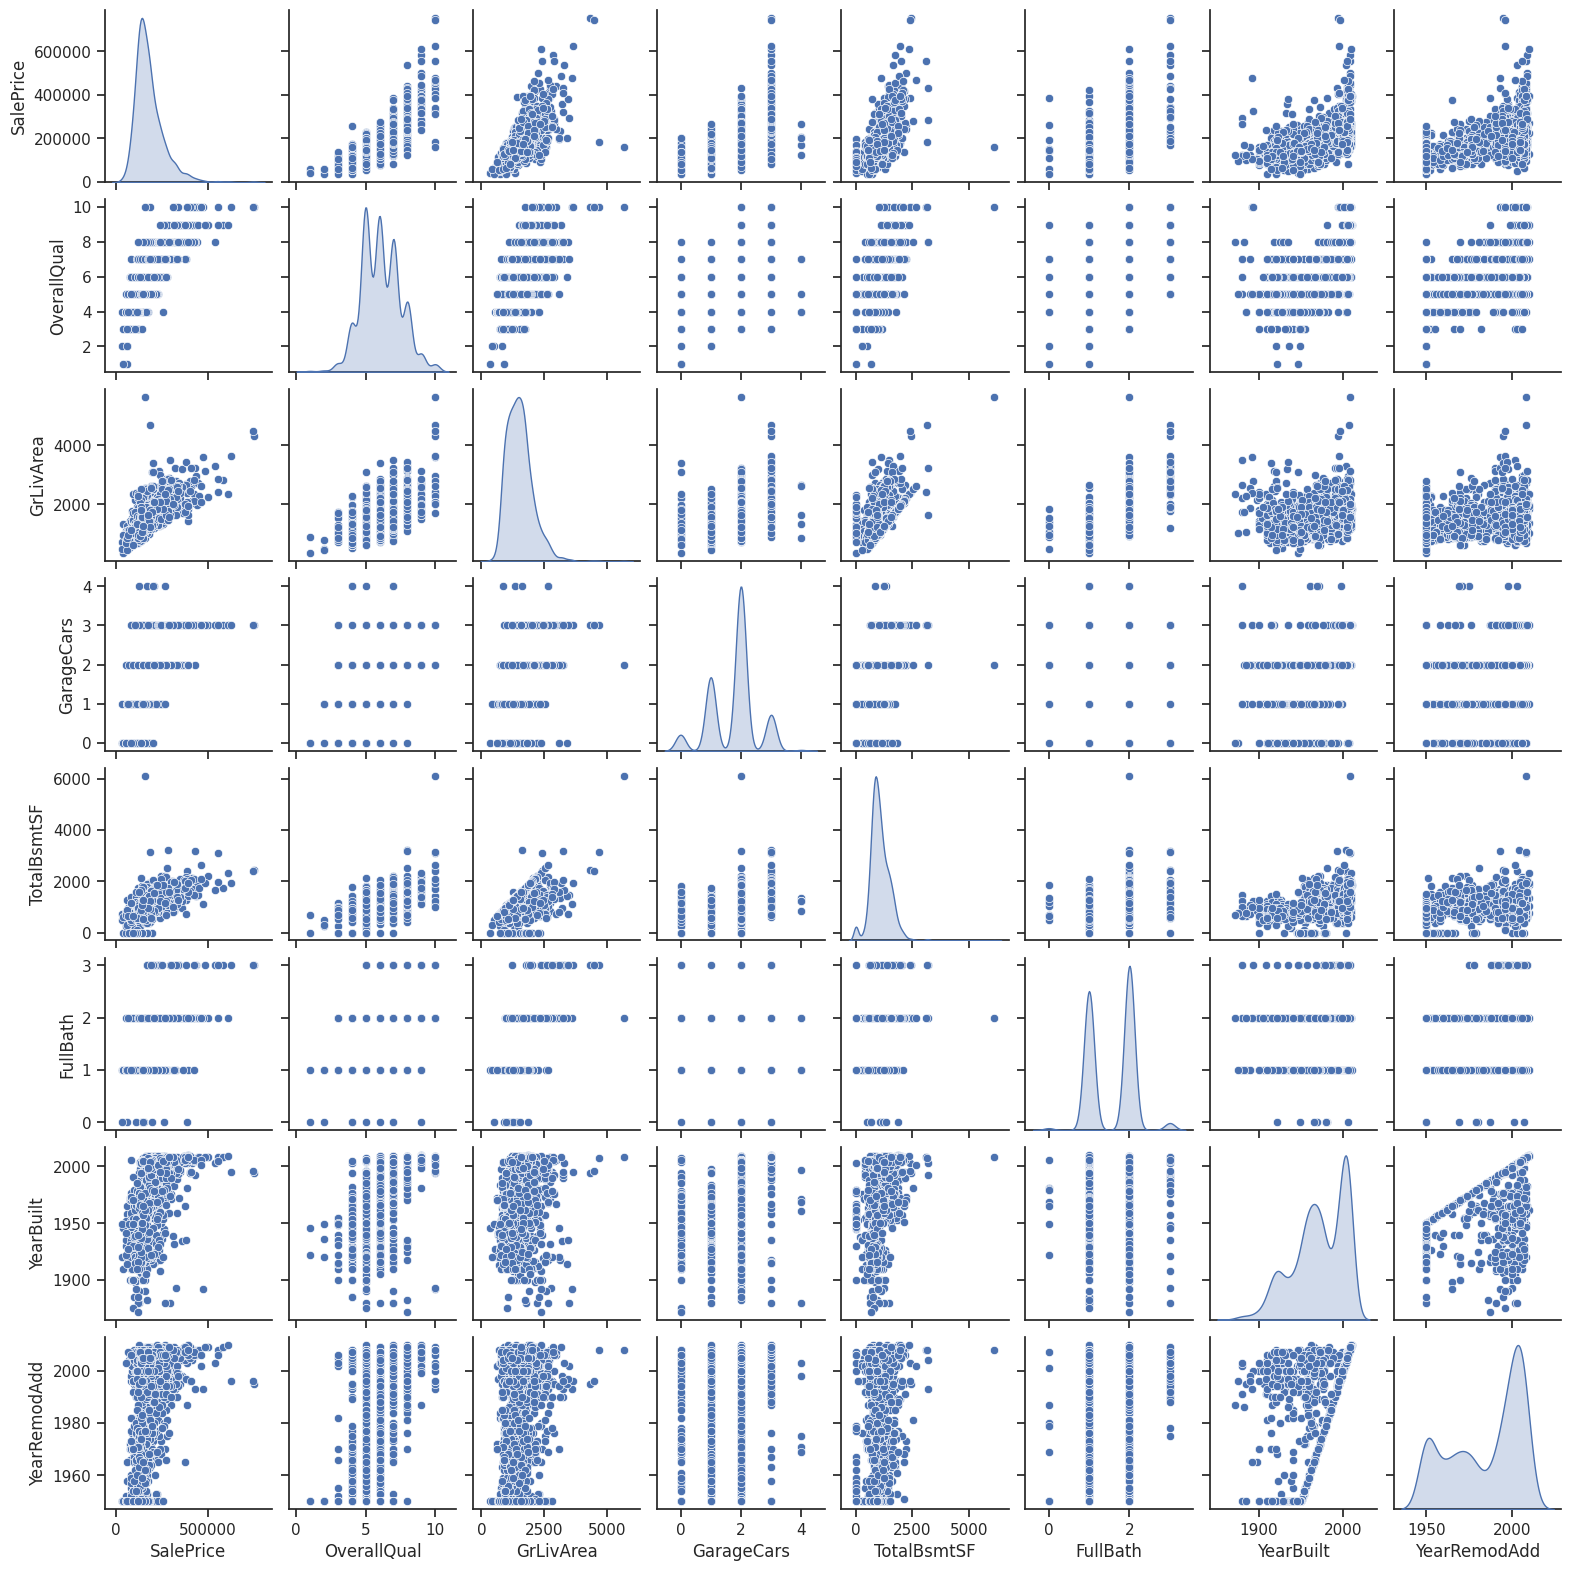

In [ ]:
# Pairplot of numeric variables
# Pairplot of numeric variable
sns.set(style="ticks", color_codes=True)
columns= ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath",
         "YearBuilt", "YearRemodAdd"]
sns.pairplot(train[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

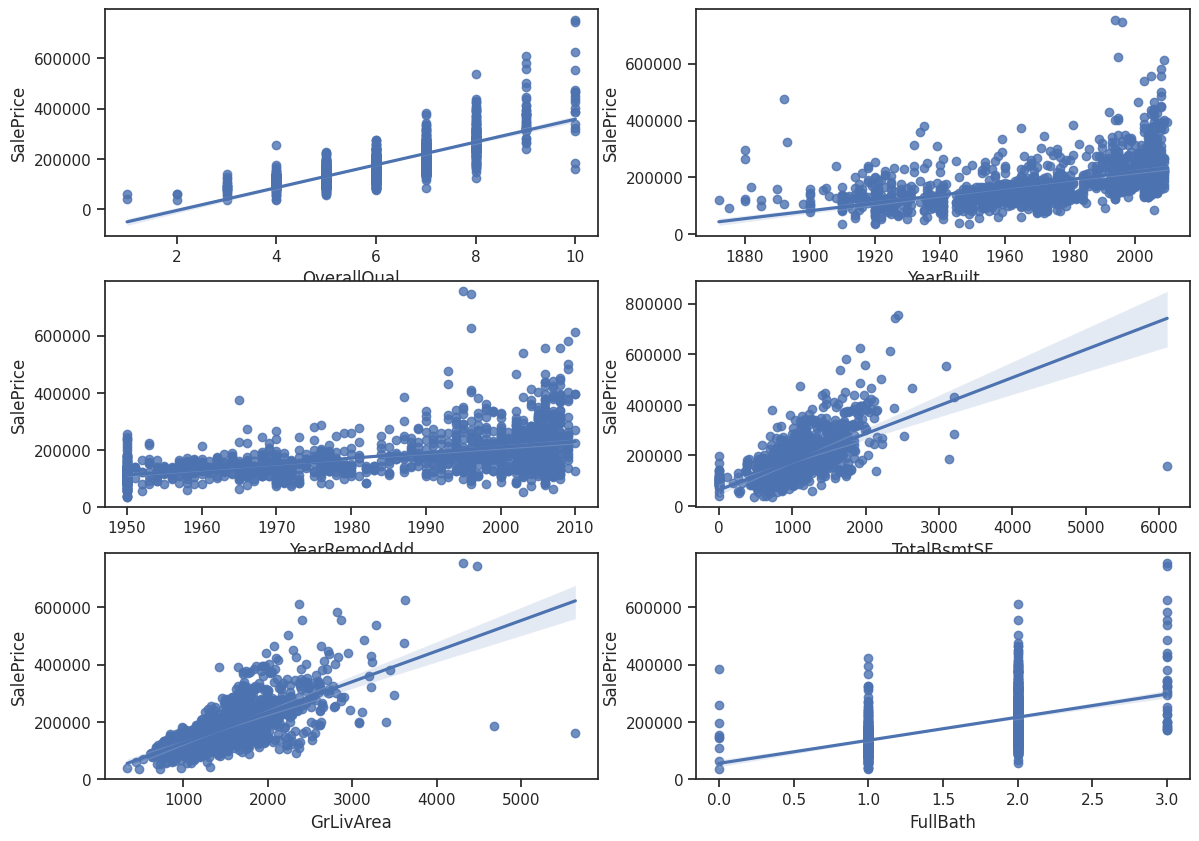

In [ ]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,10))

sns.regplot(x=train["OverallQual"], y=train["SalePrice"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=train["YearBuilt"], y=train["SalePrice"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=train["YearRemodAdd"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=train["GrLivArea"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=train["FullBath"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax6)

# sns.regplot(x=train["GarageCars"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax7)

plt.show()

# sns.regplot(x=train["OverallQual"], y=train["SalePrice"], fit_reg=False)


In [ ]:
# Check missing values in categorical variable
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
GarageFinish,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageType,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrType,8,0.547945


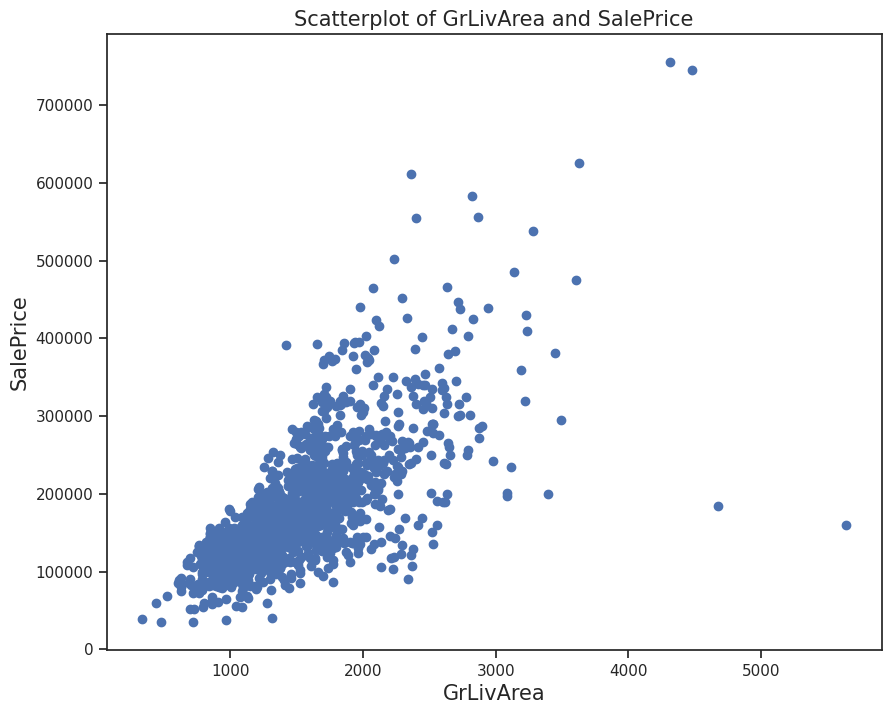

In [ ]:
# Outlier detection
plt.figure(figsize=(10,8))
plt.title("Scatterplot of GrLivArea and SalePrice", fontsize=15)
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)
plt.scatter(x= train.GrLivArea, y= train.SalePrice)

# Remove outlier
train.drop(train[(train['GrLivArea'] >4000) & (train['SalePrice']<300000)].index,inplace = True)

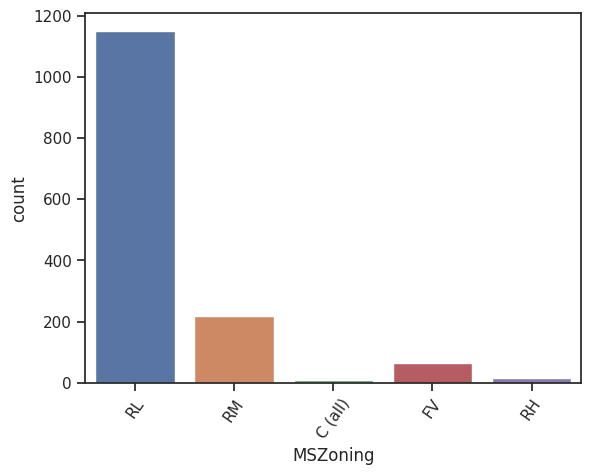

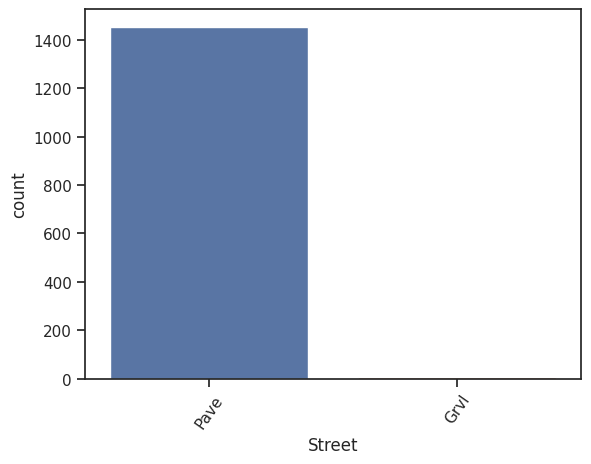

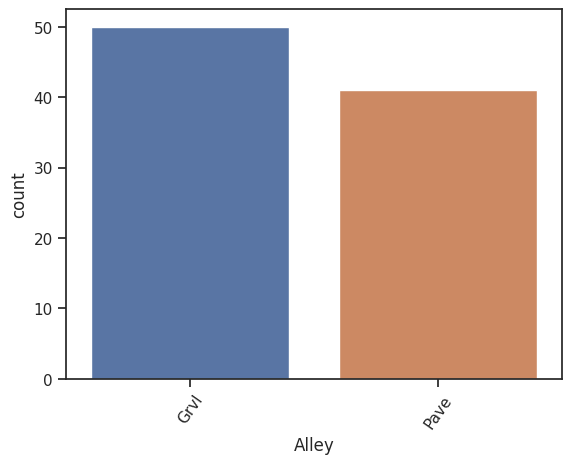

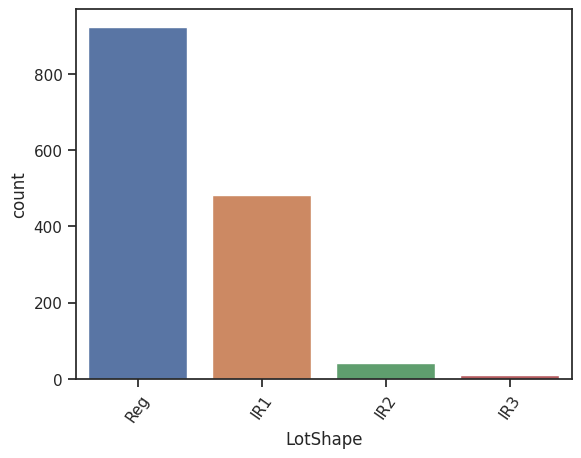

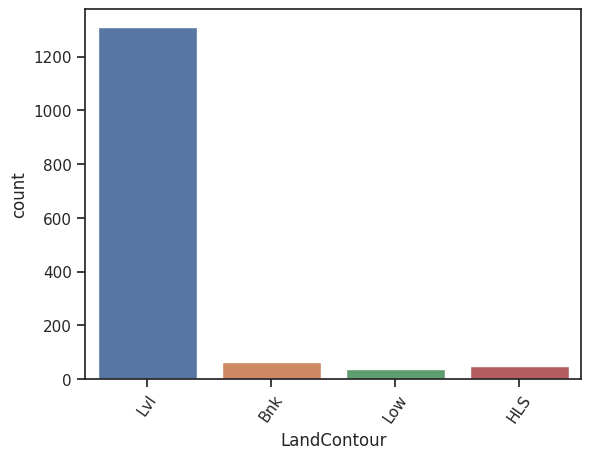

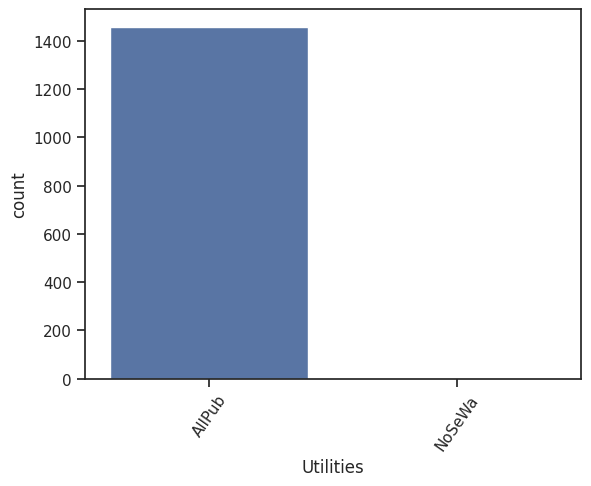

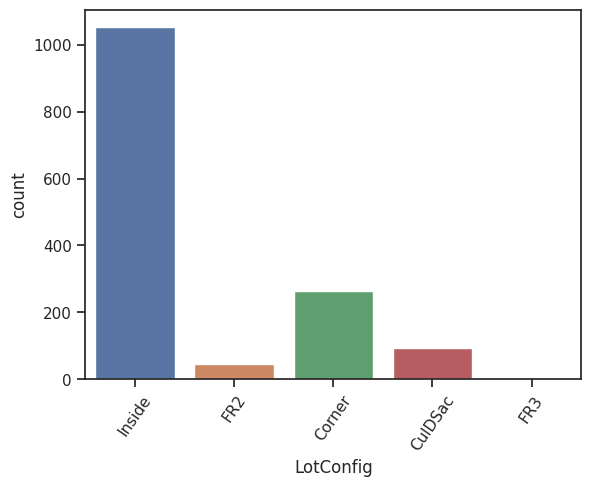

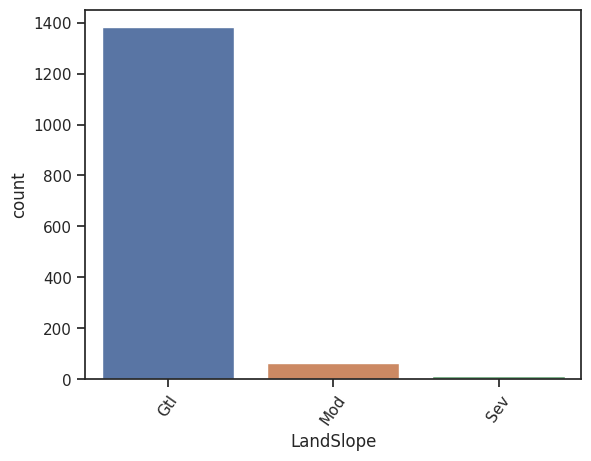

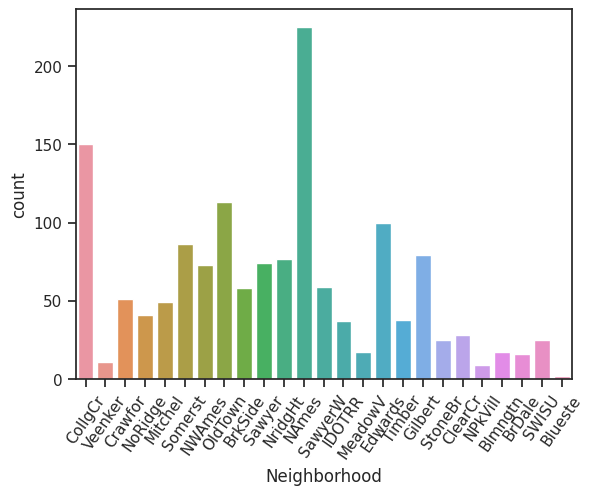

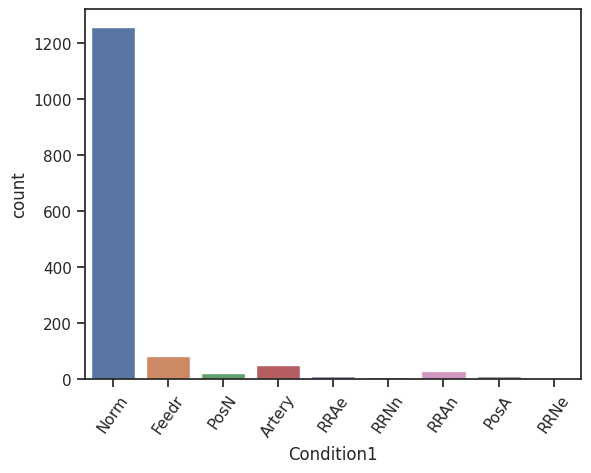

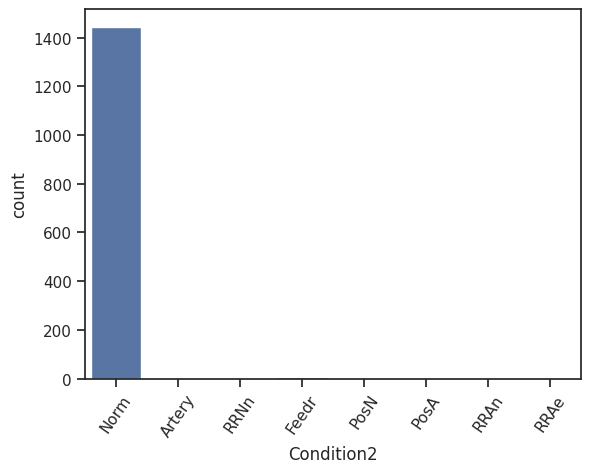

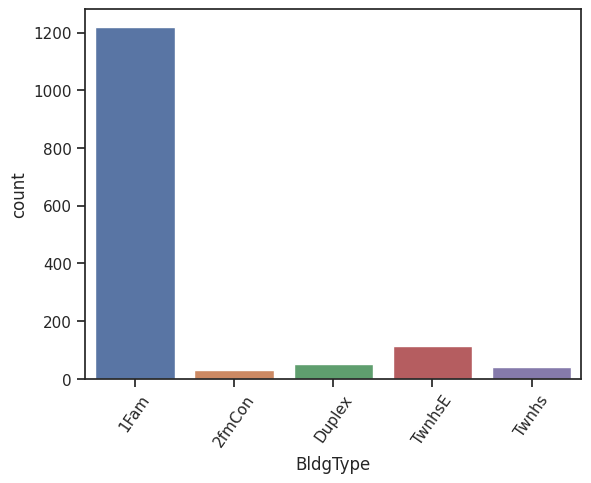

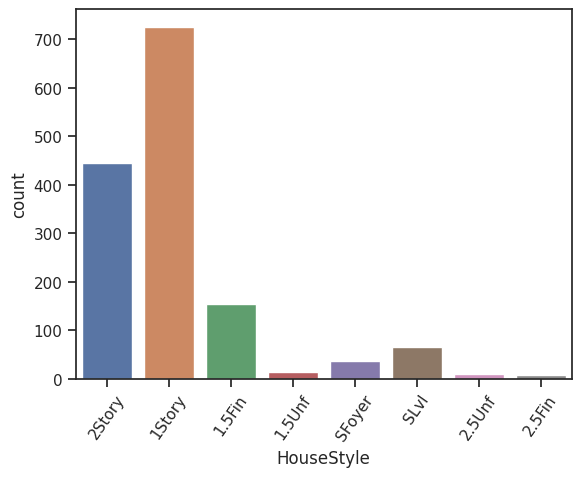

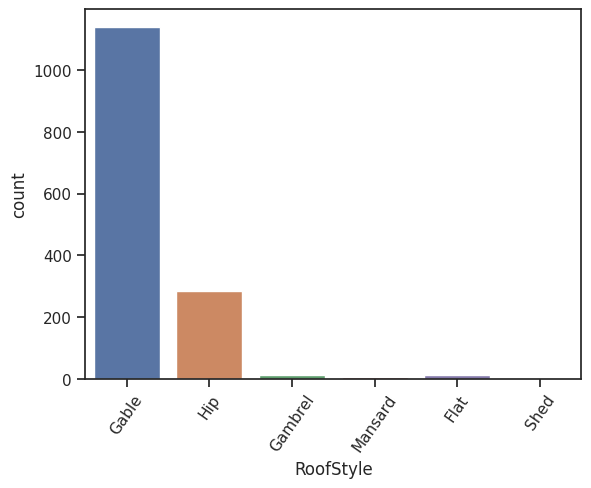

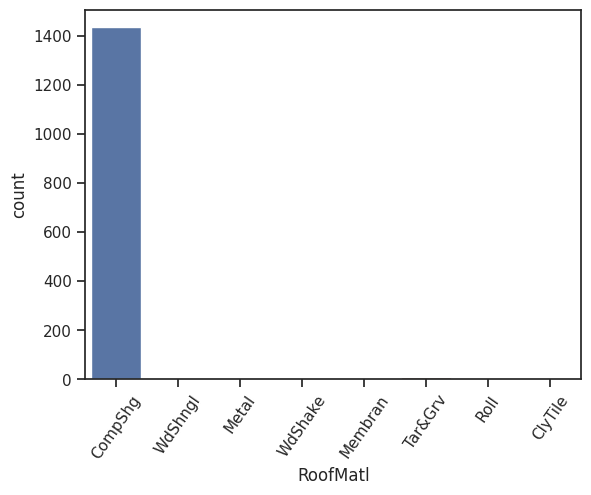

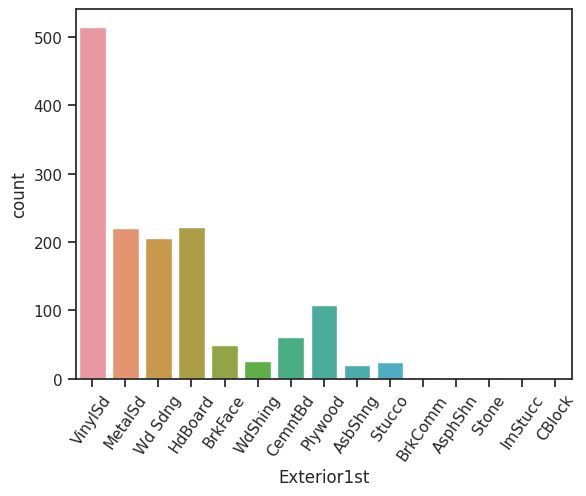

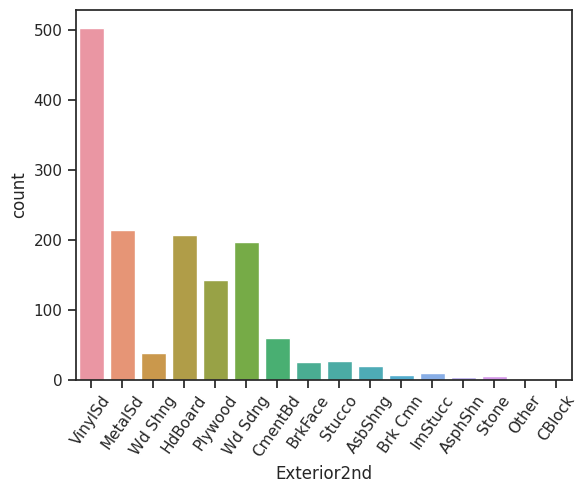

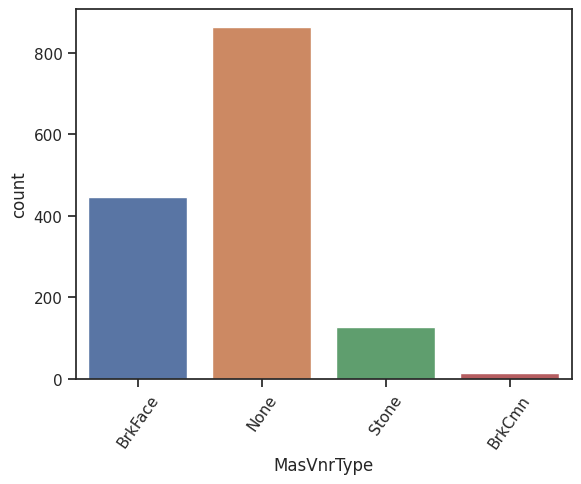

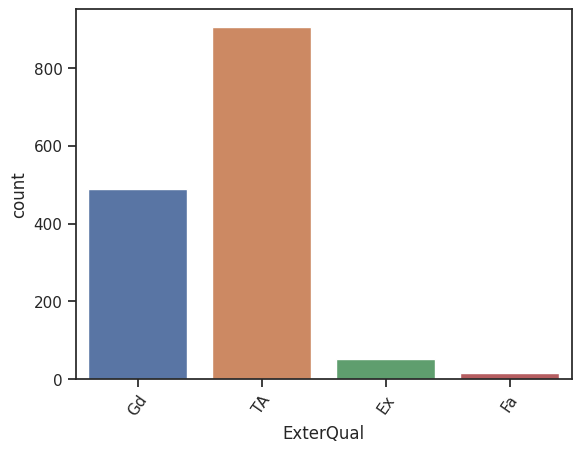

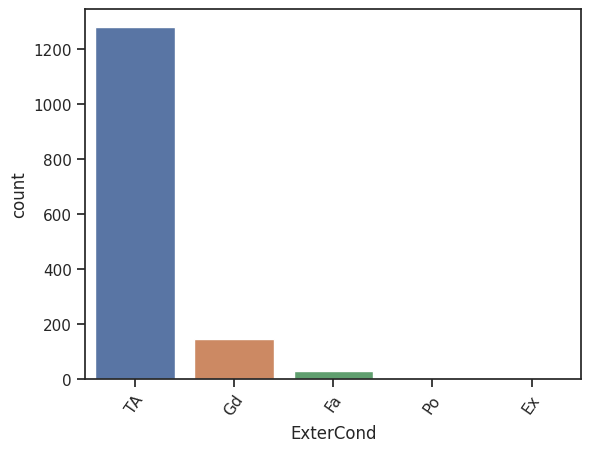

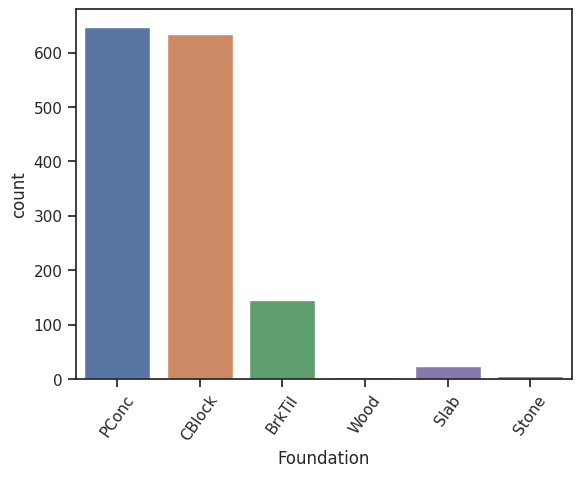

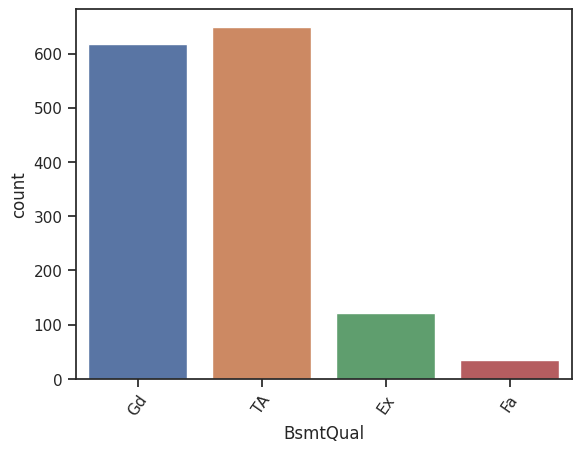

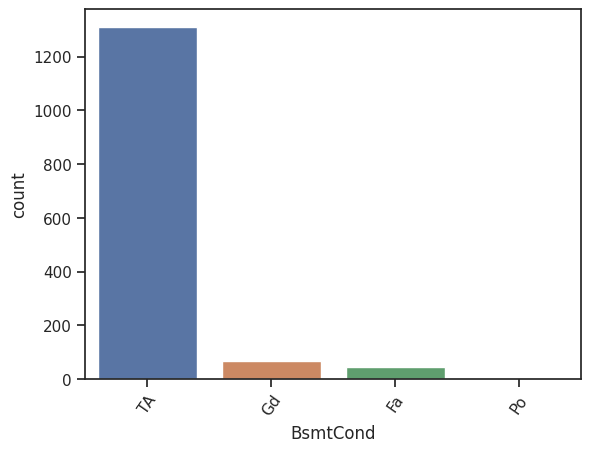

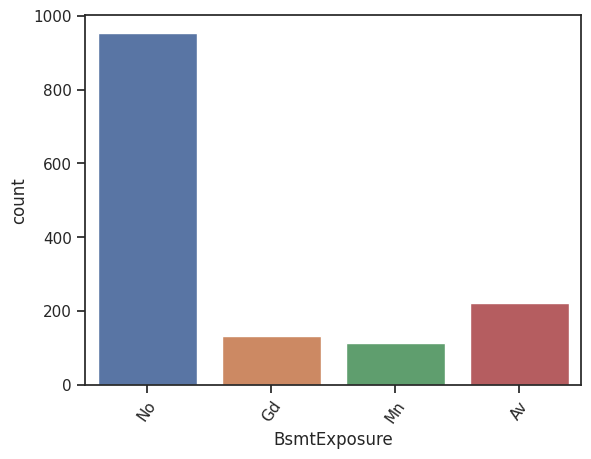

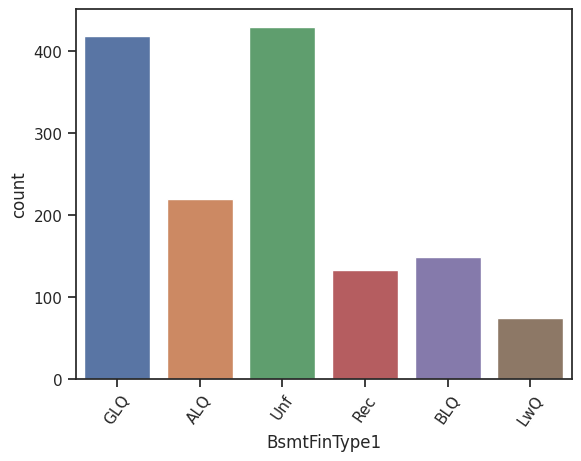

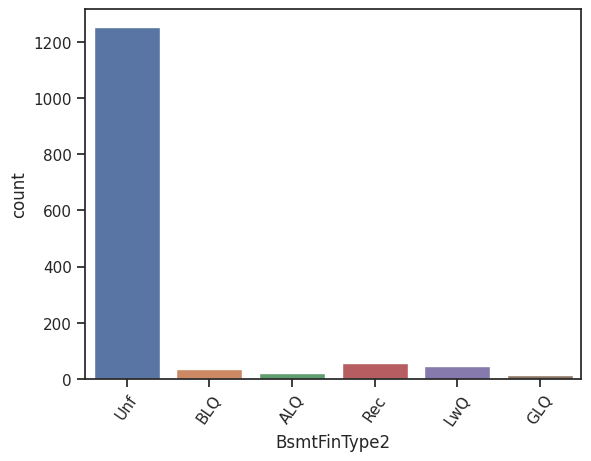

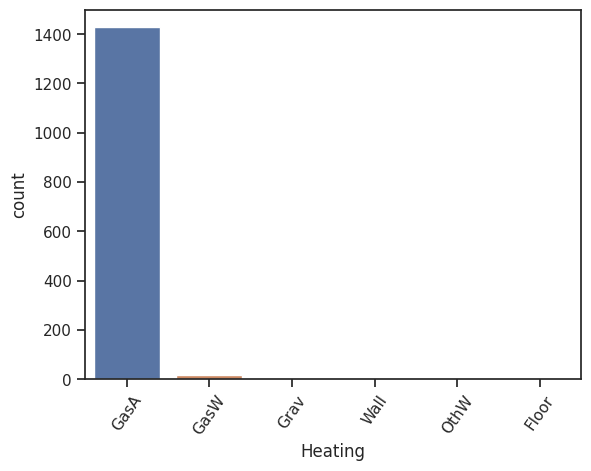

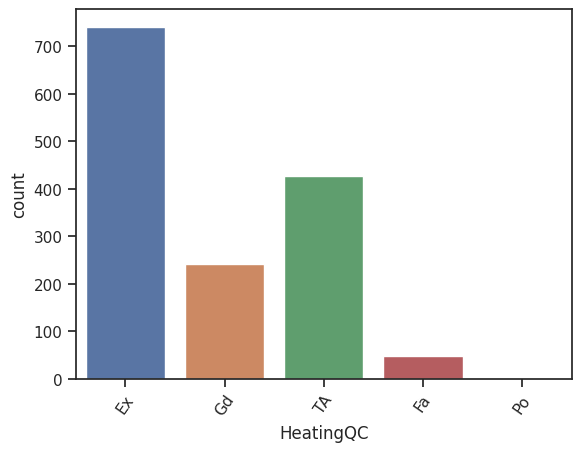

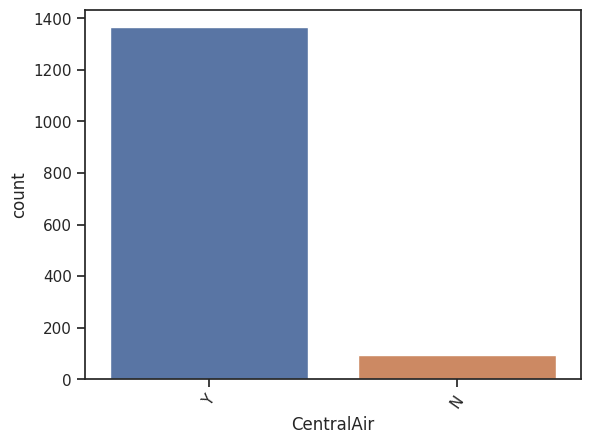

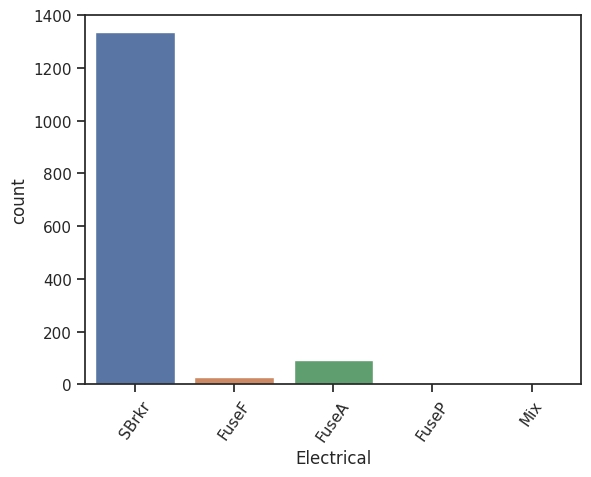

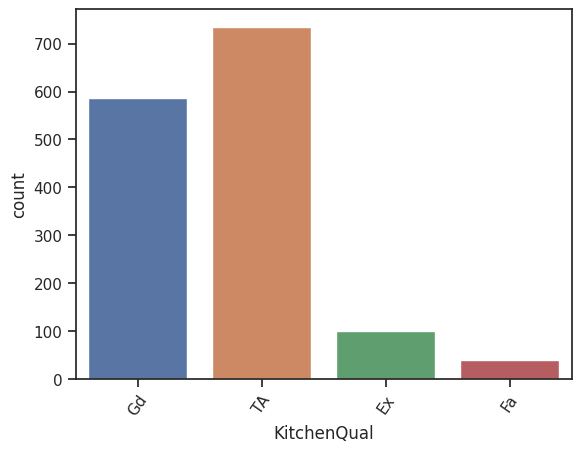

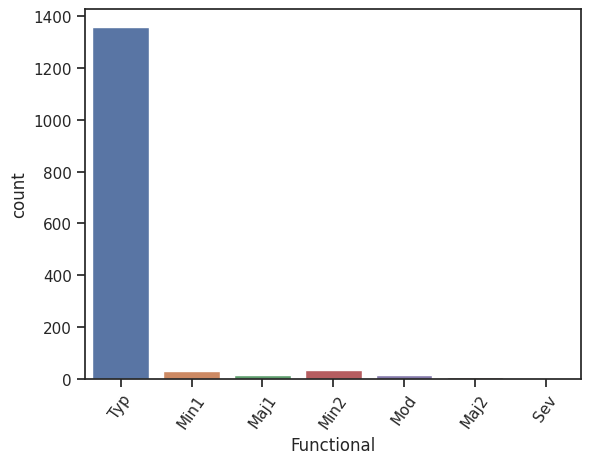

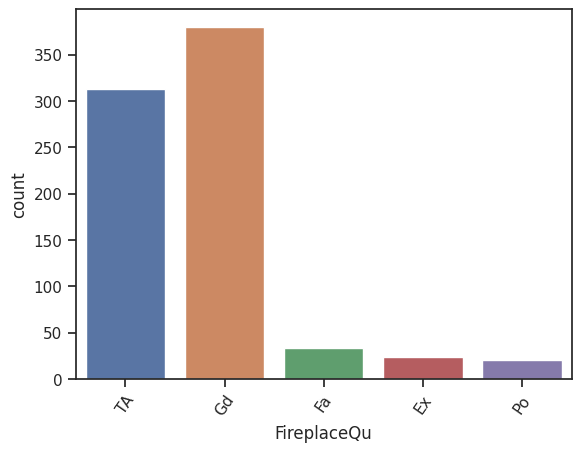

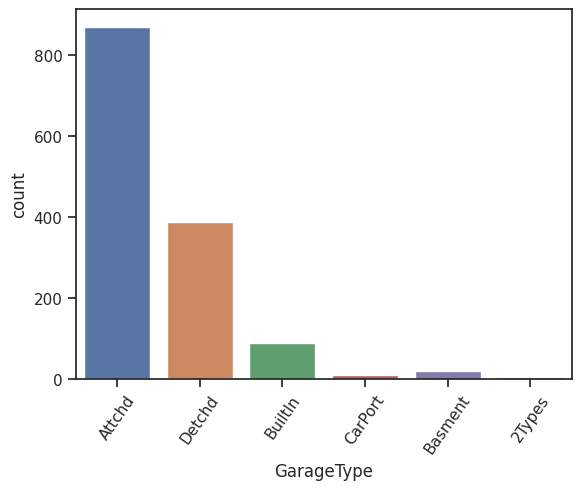

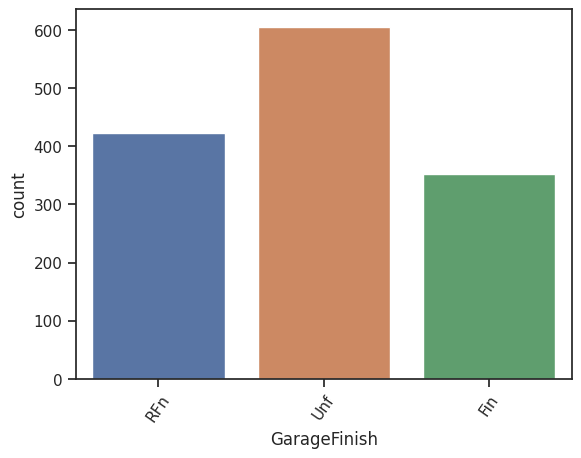

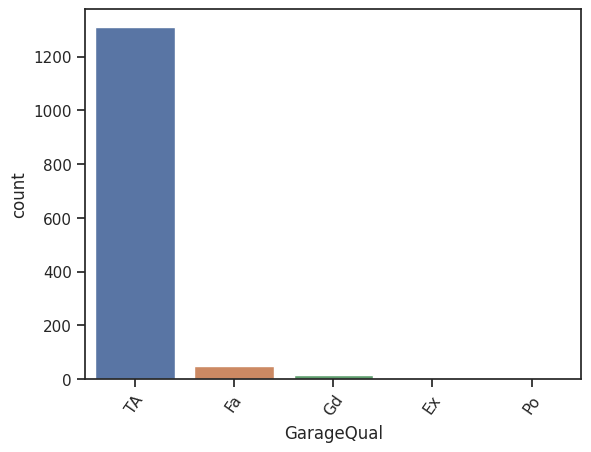

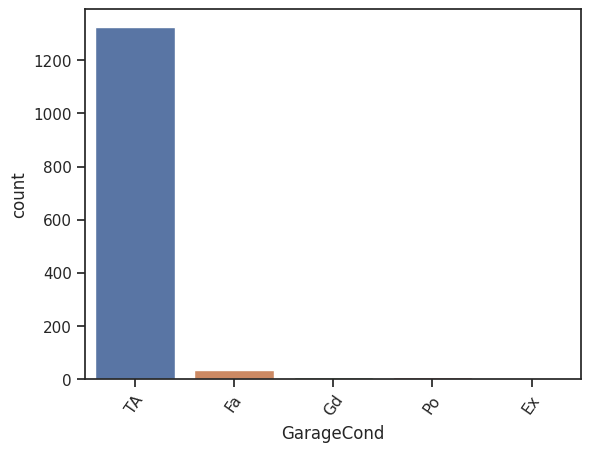

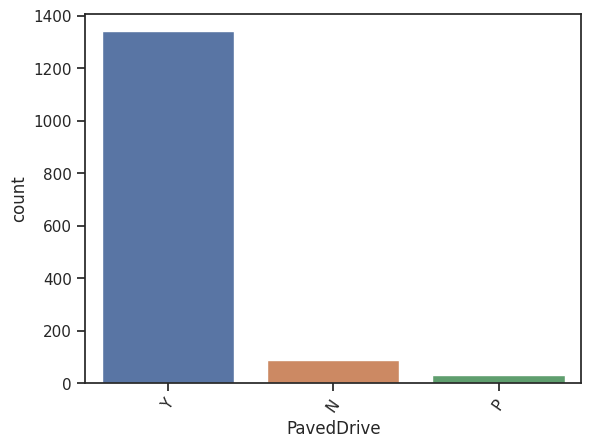

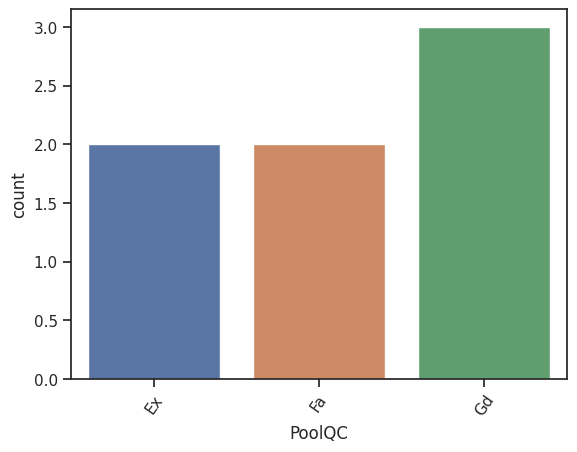

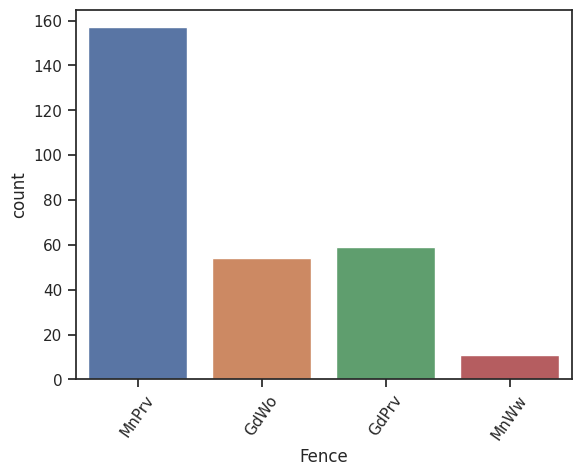

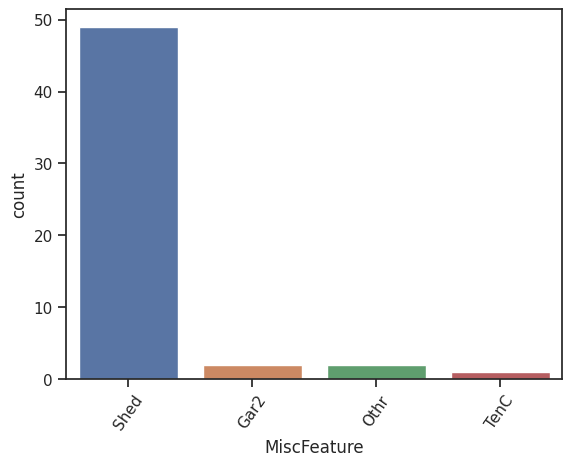

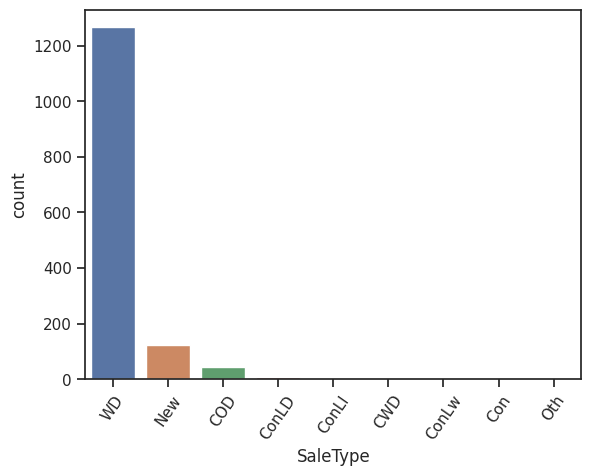

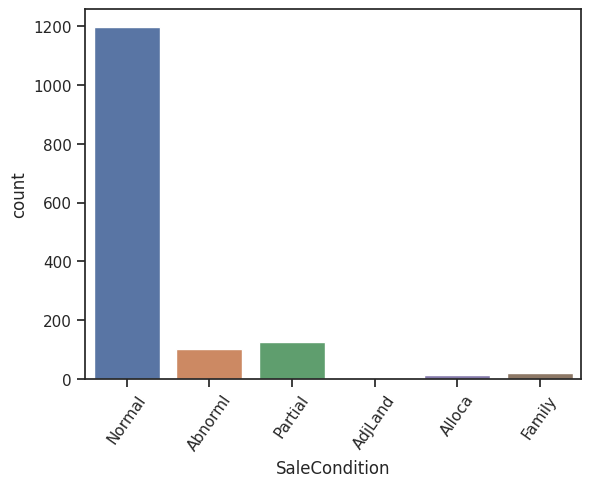

In [ ]:
for col in categorical_features.columns.tolist():
    if categorical_features[col].dtype == 'object':
        sns.countplot(x=col, data=categorical_features)
        plt.xticks(rotation=55)
        plt.show()


In [ ]:
# for col in categorical_features.columns.tolist():
#     if categorical_features[col].dtype == 'object':
#         sns.countplot(col, data=categorical_features)
#         plt.xticks(rotation=55)
#         plt.show()


In [ ]:
# Again check the missing values in remaining variables
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
GarageFinish,81,5.555556
GarageCond,81,5.555556
GarageQual,81,5.555556
GarageType,81,5.555556


In [ ]:
# Since the feature has most SBrkr we will consider this
train["Electrical"].isnull().sum()
train["Electrical"].value_counts()
train["Electrical"]= train["Electrical"].fillna(train["Electrical"].mode()[0])
test["Electrical"]= test["Electrical"].fillna(test["Electrical"].mode()[0])

In [ ]:
# MasVnrType: We will consider mode i.e we will fill None
train["MasVnrType"].isnull().sum()
train["MasVnrType"].value_counts()
train["MasVnrType"]= train["MasVnrType"].fillna(train["MasVnrType"].fillna("None"))
test["MasVnrType"]= test["MasVnrType"].fillna(test["MasVnrType"].fillna("None"))

In [ ]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features,
# NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col]= train[col].fillna("None")


for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col]= test[col].fillna("None")

In [ ]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col]= train[col].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col]= test[col].fillna("None")


In [ ]:
# MSZoning: Fill mode (RL)
test["MSZoning"].value_counts()
test["MSZoning"].isnull().sum()
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [ ]:
# Functional : data description says NA means typical
test["Functional"].value_counts()
test["Functional"].isnull().sum()
test["Functional"]= test["Functional"].fillna(test["Functional"].fillna("Typ"))

In [ ]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA .
# Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.
# We can then safely remove it.

train= train.drop(["Utilities"], axis=1)
test= test.drop(["Utilities"], axis=1)

In [ ]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value.
# We will just substitute in the most common string

test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

In [ ]:
# SaleType : Fill in again with most frequent which is "WD"

test["SaleType"]= test["SaleType"].fillna(test["SaleType"].mode()[0])

In [ ]:
# GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage
test["GarageCars"]= test["GarageCars"].fillna(test["GarageCars"].fillna(0))

In [ ]:
# TotalBsmtSF: missing values are likely zero for having no basement
test["TotalBsmtSF"]= test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].fillna(0))

In [ ]:
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the
# missing value in KitchenQual.
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [ ]:
# Check shape of the data after remvoing variables
train.shape, test.shape

((1458, 45), (1459, 44))

In [ ]:
t= train.select_dtypes(include=[np.object]).columns
t

<ipython-input-51-76e4d9d0dbb4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t= train.select_dtypes(include=[np.object]).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
# cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
#         'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1',
#         'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSZoning', 'LandContour', 'LotConfig',
#         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', )


cols= ('Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSZoning')
# Process columns, apply LabelEncoder to categories features
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]= lbl.transform(list(train[c].values))

for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c]= lbl.transform(list(test[c].values))

# Shape
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (1458, 45)
Shape all_data: (1459, 44)


In [ ]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100
# correlation_one["SalePrice"].sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       79.577427
GrLivArea         73.496816
TotalBsmtSF       65.115291
GarageCars        64.104701
FullBath          56.216475
YearBuilt         52.360840
YearRemodAdd      50.771664
Foundation        38.279511
CentralAir        25.138528
GarageCond        24.676970
Electrical        23.501010
PavedDrive        23.141874
RoofStyle         22.324799
SaleCondition     21.344499
Neighborhood      21.083807
GarageQual        20.602856
HouseStyle        18.044912
RoofMatl          13.221322
ExterCond         11.736998
Functional        11.537372
Exterior2nd       10.399141
Exterior1st       10.375988
BsmtCond           9.155997
Condition1         9.107262
BsmtFinType2       7.277598
LandSlope          5.112197
Street             4.104614
MasVnrType         1.856556
LandContour        1.503383
Condition2         0.740567
SaleType          -5.509272
LotConfig         -6.784270
BldgType          -8.566345
BsmtFinType1      -9.882992
Heating           -9

In [ ]:
# Drop uncorrelated variables
train.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

test.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

In [ ]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100

# SalePrice   : What is the price of a house
# OverallQual : Overall material and finish quality
# GrLivArea   : Above grade Ground living area square feet
# TotalBsmtSF : Total Square feet of basement area
# GarageCars  : Size of garage in car capacity
# FullBath    : Full bathroom above grade
# YearBuilt   : Original Construction date
# YearRemodAdd: Remodel date
# KitchenQual : Kitchen Quality
# BsmtQual    : Height of the basement
# ExterQual   : Exterior material Quality

SalePrice       100.000000
OverallQual      79.577427
GrLivArea        73.496816
TotalBsmtSF      65.115291
GarageCars       64.104701
FullBath         56.216475
YearBuilt        52.360840
YearRemodAdd     50.771664
KitchenQual     -59.286051
BsmtQual        -59.592332
ExterQual       -64.338104
Name: SalePrice, dtype: float64

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Reshape the data
train.shape, test.shape
test.drop(test.index[1458], inplace=True)
train.shape, test.shape

((1458, 11), (1458, 10))

In [ ]:
# Prepare data for modeling
X= train.drop("SalePrice", axis=1)
y= train.SalePrice

# Split the data and check the shape of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1020, 10), (438, 10), (1020,), (438,))

In [ ]:
# Instantiate the model
linreg= LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Make predictions
pred_test = linreg.predict(X_test)

In [ ]:
# Get the coefficient and intercept of the model
print(linreg.intercept_)
print(linreg.coef_)

-540580.8690180214
[ 12936.43437439    175.88179984    115.13715403  -8326.4738911
  -7280.47942554     41.69106268     66.52675434 -14816.39384883
 -11130.68620938   7730.58847967]


In [ ]:
# Pair the feature name with the coefficient
list(zip(train, linreg.coef_))

[('OverallQual', 12936.434374388273),
 ('YearBuilt', 175.88179983581608),
 ('YearRemodAdd', 115.13715403086522),
 ('ExterQual', -8326.473891095242),
 ('BsmtQual', -7280.479425542025),
 ('TotalBsmtSF', 41.6910626840513),
 ('GrLivArea', 66.52675434412728),
 ('FullBath', -14816.393848825308),
 ('KitchenQual', -11130.686209378722),
 ('GarageCars', 7730.5884796662485)]

In [ ]:
# Print R square
print("R Square ", linreg.score(X_test, y_test))
# So, in our model, 81.51% of the variability in Y can be explained using X.

R Square  0.815179440298739


In [ ]:
# Mean Absolute Deviation
print("MAE:", metrics.mean_absolute_error(pred_test, y_test))

MAE: 22471.484625962355


In [ ]:
# Mean Square Error
print("MSE:", metrics.mean_squared_error(pred_test, y_test))

MSE: 926045575.5713301


In [ ]:
# Root Mean square Error
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred_test, y_test)))
# Our model was able to predict the value of every house in the test set within $30430 of the real price.

RMSE: 30430.996953293037
